<a href="https://colab.research.google.com/github/kailashnirola/python_notebooks/blob/main/ZFNet_for_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, stratify=train_labels)

def preprocess(X,y):
  X = X.reshape((-1,32,32,3))/255.0
  y = to_categorical(y,10)
  return X,y

train_images, train_labels = preprocess(train_images, train_labels)
val_images, val_labels = preprocess(val_images, val_labels)
test_images, test_labels = preprocess(test_images, test_labels)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print("Before encoding:", train_labels[:5])
train_labels = to_categorical(train_labels, 10)
print("After encoding:", train_labels[:5])

Before encoding: [[5]
 [5]
 [5]
 [7]
 [3]]
After encoding: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model = Sequential([
    Input((32,32,3)),
    Conv2D(96,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3), activation='relu', padding='same'),
    MaxPooling2D((3,3)),
    Conv2D(512,(3,3), activation='relu', padding='same'),
    Conv2D(1024,(3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(train_images, train_labels, batch_size=32, epochs=30, validation_data=(val_images, val_labels), callbacks=[early_stopping])
loss, acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.1486 - loss: 2.2117 - val_accuracy: 0.4056 - val_loss: 1.5896
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.4665 - loss: 1.4306 - val_accuracy: 0.5726 - val_loss: 1.1854
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5742 - loss: 1.1680 - val_accuracy: 0.6226 - val_loss: 1.0493
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6439 - loss: 1.0083 - val_accuracy: 0.6558 - val_loss: 0.9661
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6873 - loss: 0.8897 - val_accuracy: 0.6772 - val_loss: 0.9217
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7210 - loss: 0.7951 - val_accuracy: 0.6978 - val_loss: 0.8626
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7483 - loss: 0.7160 - val_accuracy: 0.7088 - val_loss: 0.8419
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7755 -

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Models/zfnet_for_cifar.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


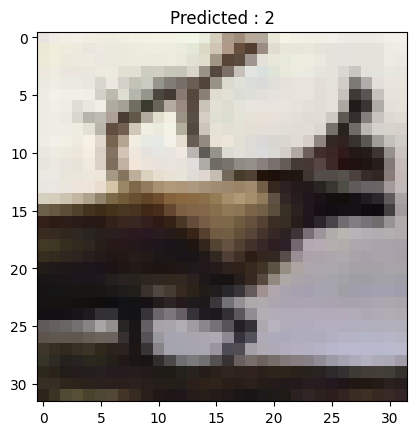

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# model = tf.keras.models.load_model('zfnet_for_cifar.keras')
pred = model.predict(test_images)
r_idx = np.random.randint(0,test_images.shape[0])
plt.title(f'Predicted : {np.argmax(pred[r_idx])}')
plt.imshow(test_images[r_idx])